In [1]:
library(ggplot2)
library(dplyr)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [101]:
## Load data - refer to http://openmv.net/info/food-texture for data description 
file = 'http://openmv.net/file/food-texture.csv'
foodData = read.csv(file, header = TRUE, row.names = 1)

In [3]:
## Print structure of data frame
str(foodData)

'data.frame':	50 obs. of  5 variables:
 $ Oil     : num  16.5 17.7 16.2 16.7 16.3 19.1 18.4 17.5 15.7 16.4 ...
 $ Density : int  2955 2660 2870 2920 2975 2790 2750 2770 2955 2945 ...
 $ Crispy  : int  10 14 12 10 11 13 13 10 11 11 ...
 $ Fracture: int  23 9 17 31 26 16 17 26 23 24 ...
 $ Hardness: int  97 139 143 95 143 189 114 63 123 132 ...


In [4]:
## Print first 5 samples of data frame
head(foodData, n = 5)

,Oil,Density,Crispy,Fracture,Hardness
,<dbl>,<int>,<int>,<int>,<int>
B110,16.5,2955,10,23,97
B136,17.7,2660,14,9,139
B171,16.2,2870,12,17,143
B192,16.7,2920,10,31,95
B225,16.3,2975,11,26,143


In [109]:
## Modify data frame
# Rename Oil column to OilPercentage
foodData = foodData %>% rename(OilPercentage = Oil)

# Modify crispy column to reflect high (0) and low (1) crispness
foodData = foodData %>% mutate(Crispy = ifelse(Crispy > 11, 'high', 'low'))

# Change Crispy column to factor type
foodData['Crispy'] = lapply(foodData['Crispy'], factor)

In [6]:
## Print structure of modified data frame
str(foodData)

'data.frame':	50 obs. of  5 variables:
 $ OilPercentage: num  16.5 17.7 16.2 16.7 16.3 19.1 18.4 17.5 15.7 16.4 ...
 $ Density      : int  2955 2660 2870 2920 2975 2790 2750 2770 2955 2945 ...
 $ Crispy       : Factor w/ 2 levels "high","low": 2 1 1 2 2 1 1 2 2 2 ...
 $ Fracture     : int  23 9 17 31 26 16 17 26 23 24 ...
 $ Hardness     : int  97 139 143 95 143 189 114 63 123 132 ...


In [7]:
## Print first 5 samples of modified data frame
head(foodData, n = 5)

,OilPercentage,Density,Crispy,Fracture,Hardness
,<dbl>,<int>,<fct>,<int>,<int>
B110,16.5,2955,low,23,97
B136,17.7,2660,high,9,139
B171,16.2,2870,high,17,143
B192,16.7,2920,low,31,95
B225,16.3,2975,low,26,143


**Question-1**: Make a scatter plot between Density (x-axis) and OilPercentage (y-axis). What do you observe from this plot?

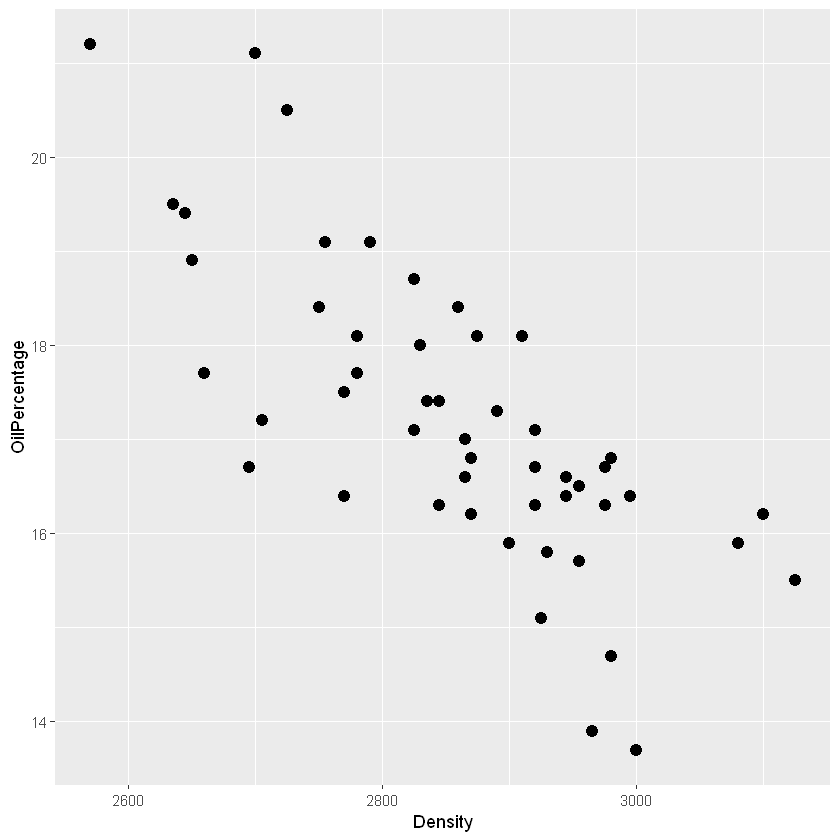

In [8]:
## Scatter plot between Density (x-axis) and OilPercentage (y-axis)
p1 = ggplot(data = foodData, aes(x = Density, y = OilPercentage)) +
  geom_point(size = 3) 
p1

**Question-2**: Make a scatter plot between Density (x-axis) and OilPercentage (y-axis) color coded using Crispy. What do you observe from this plot?

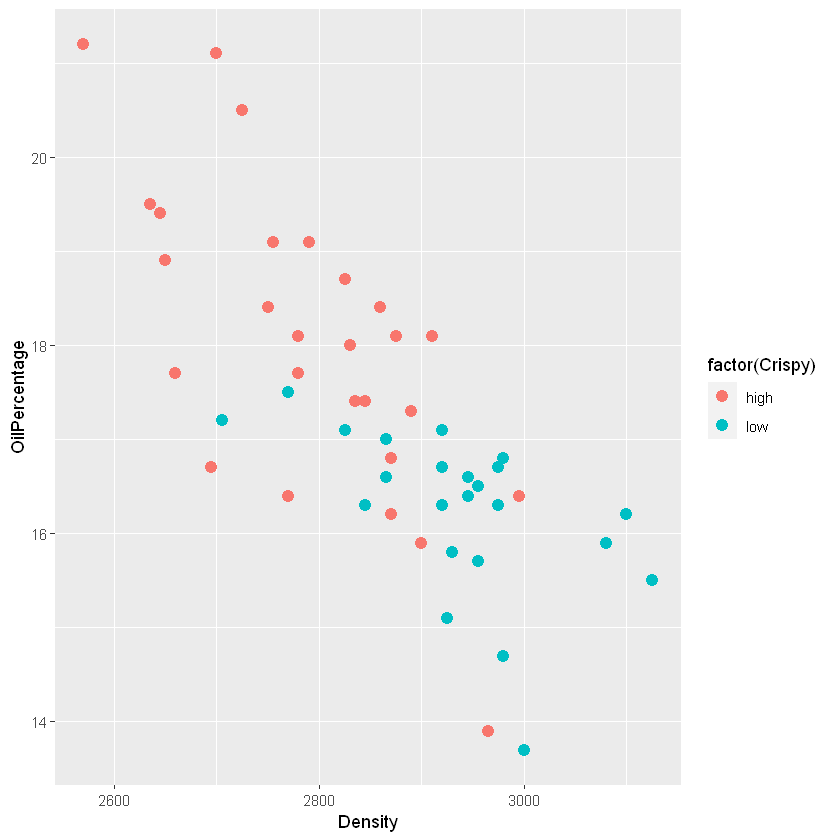

In [9]:
## Scatter plot between Density (x-axis) and OilPercentage (y-axis) color coded using Crispy
p2 = ggplot(data = foodData, aes(x = Density, y = OilPercentage, color = factor(Crispy)))+
    geom_point(size = 3)
p2

**Question-3**: Calculate Pearson's correlation between Density and OilPercentage. 

In [10]:
## Print correlation between Density and OilPercentage
cor(foodData$Density, foodData$OilPercentage, method = 'pearson')

[1] -0.750024

**Question-4**: Select data frame without Crispy column.

In [11]:
## Select data frame without Crispy column
fData = foodData %>% select(-c('Crispy'))
head(fData, n = 5)

,OilPercentage,Density,Fracture,Hardness
,<dbl>,<int>,<int>,<int>
B110,16.5,2955,23,97
B136,17.7,2660,9,139
B171,16.2,2870,17,143
B192,16.7,2920,31,95
B225,16.3,2975,26,143


**Question-5**: Scale data frame selected above.

In [28]:
## Scale data frame selected above
fDataScaled = as.data.frame(scale(fData))

#Covariance of the scaled data
print(cov(fDataScaled))

#Corelation of the scaled data
print(cor(fDataScaled))

#Corelation of the data
print(cor(fData))

              OilPercentage    Density   Fracture    Hardness
OilPercentage    1.00000000 -0.7500240 -0.5337392 -0.09604521
Density         -0.75002399  1.0000000  0.5721324  0.10793720
Fracture        -0.53373917  0.5721324  1.0000000 -0.37335844
Hardness        -0.09604521  0.1079372 -0.3733584  1.00000000
              OilPercentage    Density   Fracture    Hardness
OilPercentage    1.00000000 -0.7500240 -0.5337392 -0.09604521
Density         -0.75002399  1.0000000  0.5721324  0.10793720
Fracture        -0.53373917  0.5721324  1.0000000 -0.37335844
Hardness        -0.09604521  0.1079372 -0.3733584  1.00000000
              OilPercentage    Density   Fracture    Hardness
OilPercentage    1.00000000 -0.7500240 -0.5337392 -0.09604521
Density         -0.75002399  1.0000000  0.5721324  0.10793720
Fracture        -0.53373917  0.5721324  1.0000000 -0.37335844
Hardness        -0.09604521  0.1079372 -0.3733584  1.00000000


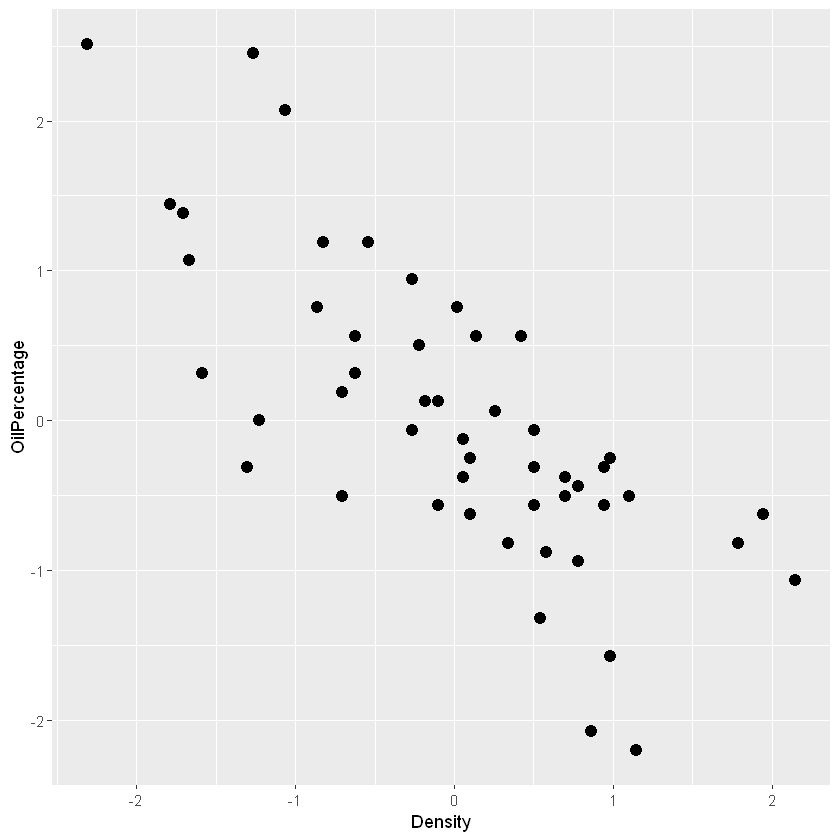

In [18]:
## Scatter plot between Density (x-axis) and OilPercentage (y-axis) color coded using Crispy
p9 = ggplot(data = fDataScaled, aes(x = Density, y = OilPercentage))+
    geom_point(size = 3)
p9

In [13]:
## Print first 5 rows of scaled data frame
head(fDataScaled, n = 5)

,OilPercentage,Density,Fracture,Hardness
,<dbl>,<dbl>,<dbl>,<dbl>
B110,-0.4409529,0.78232945,0.3915059,-1.0016841
B136,0.3128127,-1.58714886,-2.1697476,0.3476017
B171,-0.6293943,0.09959841,-0.7061742,0.4761051
B192,-0.3153253,0.50120490,1.8550793,-1.0659358
B225,-0.5665805,0.94297204,0.9403459,0.4761051


**Question 6**: From the output of the cell below, answer the following questions:


1.   Which principal component assigns the greatest weight (in magnitude) to Density?      
2.   Which principal component assigns the greatest weight (in magnitude) to OilPercentage?
3.    True/false: the 2nd principal component score for a sample assigns a maximum weight to its Hardness.

**Answers**

1. First Principle Component assigns the greatest weight to Density
2. Fourth Principle Component assigns the greatest weight to OilPercentage
3. True 



In [52]:
#Sample Covariance Matrix
S = cov(fData)

# Calculate eigenvalues & eigenvectors of sample covariance matrix
e = eigen(S) 

# Eigenvectors of the sample covariance matrix
u = e$vectors

# Eigenvalues of the sample covariance matrix
lambda = e$values

# Extract data matrix from data frame
X = as.matrix(fData)

# Print first sample
print(X[1, ]) 

# Print the first 3 eigenvectors or principal directions
print(u[,1:3]) 

print(prcomp(fData))

OilPercentage       Density      Fracture      Hardness 
         16.5        2955.0          23.0          97.0 
             [,1]          [,2]        [,3]
[1,]  0.009586874 -0.0004450571  0.07247084
[2,] -0.999232018 -0.0265642071  0.02779123
[3,] -0.024996203 -0.0789396372 -0.99393044
[4,] -0.028612149  0.9965253025 -0.07796089
Standard deviations (1, .., p=4):
[1] 124.592891  31.029178   3.787778   1.018706

Rotation (n x k) = (4 x 4):
                       PC1           PC2         PC3          PC4
OilPercentage  0.009586874 -0.0004450571  0.07247084 -0.997324356
Density       -0.999232018 -0.0265642071  0.02779123 -0.007573901
Fracture      -0.024996203 -0.0789396372 -0.99393044 -0.072429274
Hardness      -0.028612149  0.9965253025 -0.07796089 -0.006384787


**Question-7**: Explain the output of the cell below?

**Answer**
Variance of the data project along the first principal component 

In [53]:
#Variance of the data projected along the first principal component
print(var(X %*% u[, 1])) 

         [,1]
[1,] 15523.39


**Question-8**: How many minimum principal components are needed to explain more than 90% of the variance in the data? Show calculation in code cell below.

In [54]:
#1 princple component is needed 
varPercent = (lambda/sum(lambda))*100

cumsum(varPercent)

[1]  94.07211  99.90677  99.99371 100.00000

**Question 9**: From the output of the cell below, answer the following questions:


1.   Which principal component assigns positive weights for all the features?
2.   The 1st principal component assigns the least weight (in magnitude) to which feature?

**Answers**

1. Principal Component 3 assigns positive weights for all features 
2. 1st principal component assigns the least weight to Hardness Feature

In [93]:
# Calculate eigenvalues & eigenvectors of sample correlation matrix
e = eigen(cov(fDataScaled)) 

# Eigenvectors of the sample correlation matrix
u = e$vectors

# Eigenvalues of the sample correlation matrix
lambda = e$values

# Extract data matrix from data frame
X = as.matrix(fDataScaled)

# Print first sample
print(X[1, ]) 

# Print the first 3 eigenvectors or principal directions
print(u[, 1:3]) 

prcomp(fDataScaled)

OilPercentage       Density      Fracture      Hardness 
   -0.4409529     0.7823294     0.3915059    -1.0016841 
            [,1]       [,2]       [,3]
[1,]  0.58633268 -0.2240111 0.59225884
[2,] -0.59639892  0.2197746 0.01510427
[3,] -0.54419604 -0.3762826 0.67499995
[4,]  0.06612857  0.8717394 0.43974583


Standard deviations (1, .., p=4):
[1] 1.4991499 1.1013861 0.5488669 0.4881017

Rotation (n x k) = (4 x 4):
                      PC1        PC2        PC3        PC4
OilPercentage  0.58633268 -0.2240111 0.59225884 -0.5052351
Density       -0.59639892  0.2197746 0.01510427 -0.7718674
Fracture      -0.54419604 -0.3762826 0.67499995  0.3265534
Hardness       0.06612857  0.8717394 0.43974583  0.2057209

**Question-10**: How many minimum principal components are needed to explain more than 90% of the variance in the data? Show calculation in code cell below.

In [56]:
#Three principle components are needed
varPercent = (lambda/sum(lambda))*100
cumsum(varPercent)

[1]  56.18626  86.51255  94.04392 100.00000

In [65]:
## Select data frame consisiting of two features: Density & OilPercentage
fDataTwoFeatures = fData %>% select(c('Density', 'OilPercentage'))

In [66]:
## Calculate sample correlation matrix of data frame selected above
corMatrix = cor(fDataTwoFeatures)
print(corMatrix)

                Density OilPercentage
Density        1.000000     -0.750024
OilPercentage -0.750024      1.000000


In [67]:
# Calculate eigenvalues & eigenvectors of sample correlation matrix
e = eigen(corMatrix)
u = e$vectors
lambda = e$values 
print(u)
print(lambda)

           [,1]       [,2]
[1,] -0.7071068 -0.7071068
[2,]  0.7071068 -0.7071068
[1] 1.750024 0.249976


In [68]:
## Extract scaled data matrix from data frame
X = scale(fDataTwoFeatures)

**Question-11**: Complete the code cell below for calculating the shadow length and vector projection on to the first principal component direction.

In [69]:
## Project samples onto the direction of the first eigenvector

# Calculate shadow length of data
shadowLength1 = X %*% u[, 1]
shadowLength1 = as.numeric(shadowLength1)

# Vector projection
unitVector = u[, 1]
projectedSamples1 = u[, 1] %*% t(as.matrix(shadowLength1))

In [70]:
## Scale data frame and add Crispy column to data frame
fDataTwoFeaturesScaled = as.data.frame(scale(fDataTwoFeatures))
fDataTwoFeaturesScaled['Crispy'] = foodData['Crispy']

**Question-12**: Complete code below to output a scatter plot of Density and OilPercentage, color coded using Crispy along with the first and second eigenvectors with the projected data on to the first principal direction also color coded using Crispy.

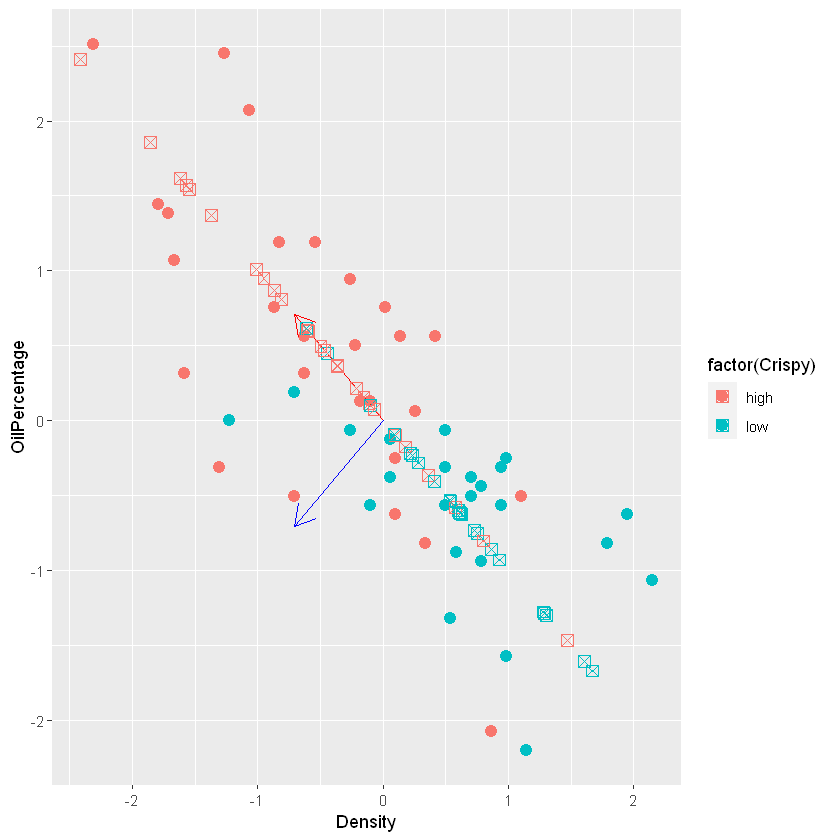

In [76]:
## Scatter plot of Density and OilPercentage, color coded using Crispy and first
## two eigenvectors with the projected data on to the first principal direction
## also color coded using Crispy
u = -u # this is a minor adjustment to flip the sign of the eigenvectors
p3 = fDataTwoFeaturesScaled %>% ggplot(aes(x = Density, y = OilPercentage, color = factor(Crispy))) +
  geom_point(size = 3) +
  geom_segment(aes(x = 0, y = 0, xend = u[1, 1], yend = u[2, 1]), size = 0.5,
   arrow = arrow(length = unit(0.5,"cm")), color = 'red') +
  geom_segment(aes(x = 0, y = 0, xend = u[1, 2], yend = u[2, 2]), size = 0.5,
   arrow = arrow(length = unit(0.5,"cm")), color = 'blue') +
  geom_point(aes(x = projectedSamples1[1, ], y = projectedSamples1[2, ], color = factor(Crispy)), shape = 7, size = 3.0) 
p3

**Question-13**: Projected data on to which principal direction (1st or 2nd) shows maximum separability in the data with respect to Crispy?

In [113]:
fDataPCA = X %*% u

In [110]:
pcaData <- prcomp(fDataScaled)
pcaDataFrame = pcaData$x[,1:4]

scores = data.frame(pcaDataFrame,foodData$Crispy)

head(scores, n = 5)

,PC1,PC2,PC3,PC4,foodData.Crispy
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
B110,-1.00442142,-0.7498098,-0.4255617,-0.45928948,low
B136,2.33374067,0.7005678,-1.1504298,0.42999494,high
B171,-0.01265347,0.8436412,-0.6385623,0.10845649,high
B192,-1.56381922,-1.4464638,0.6042538,0.15894691,low
B225,-1.37484055,0.3953654,0.5227793,-0.03657509,low


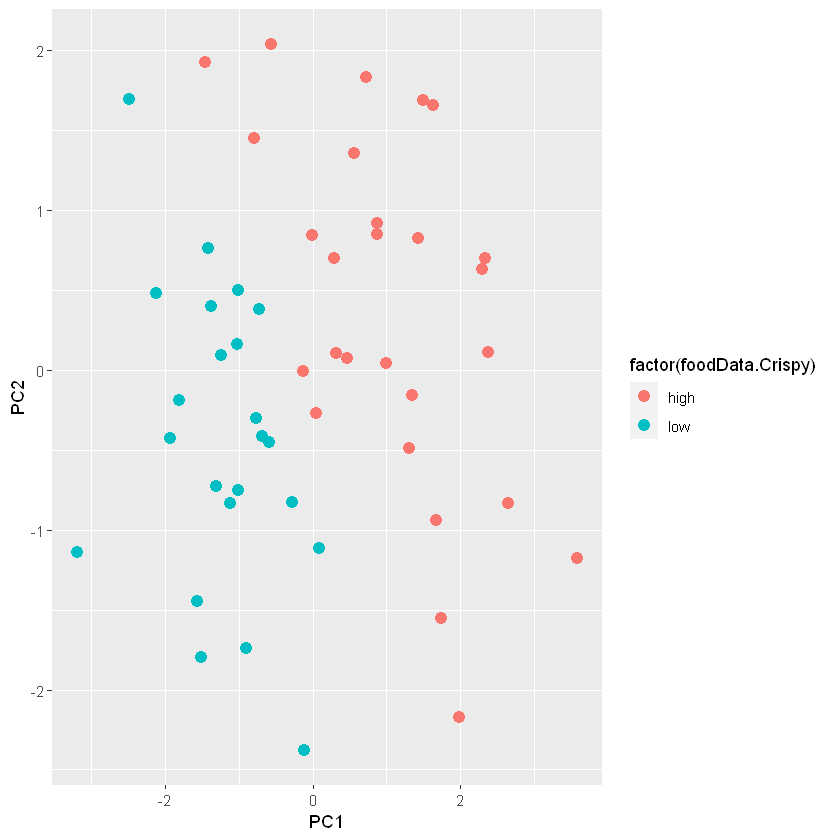

In [119]:
pc1 = scores %>% ggplot(aes(x = PC1, y = PC2, color = factor(foodData.Crispy))) +
    geom_point(size = 3)
pc1

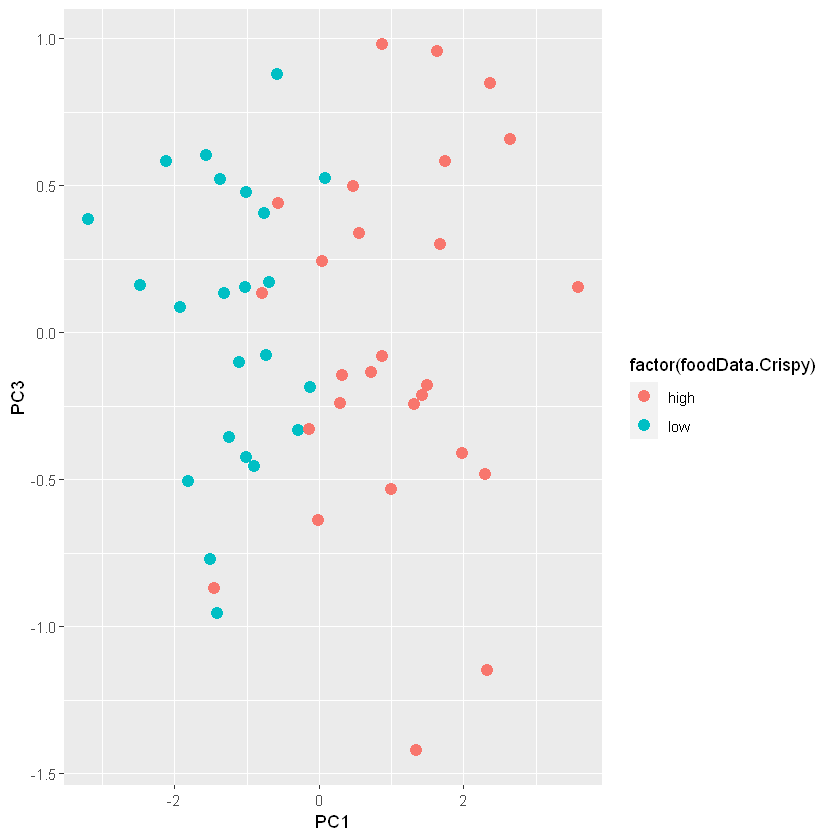

In [115]:
pc2 = scores %>% ggplot(aes(x = PC1, y = PC3, color = factor(foodData.Crispy))) +
    geom_point(size = 3)
pc2

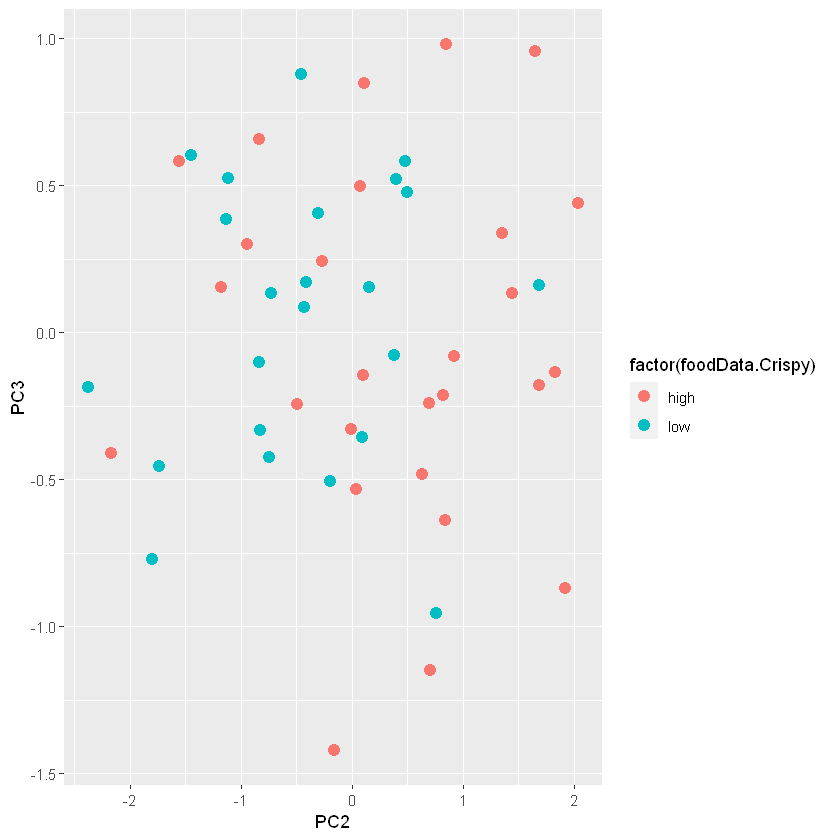

In [120]:
pc3 = scores %>% ggplot(aes(x = PC2, y = PC3, color = factor(foodData.Crispy))) +
    geom_point(size = 3)
pc3

In [121]:
cor(pcaDataFrame)

,PC1,PC2,PC3,PC4
PC1,1.000000e+00,2.280180e-16,-4.950457e-16,1.623938e-16
PC2,2.280180e-16,1.000000e+00,-3.749898e-18,2.492051e-16
PC3,-4.950457e-16,-3.749898e-18,1.000000e+00,3.070421e-16
PC4,1.623938e-16,2.492051e-16,3.070421e-16,1.000000e+00


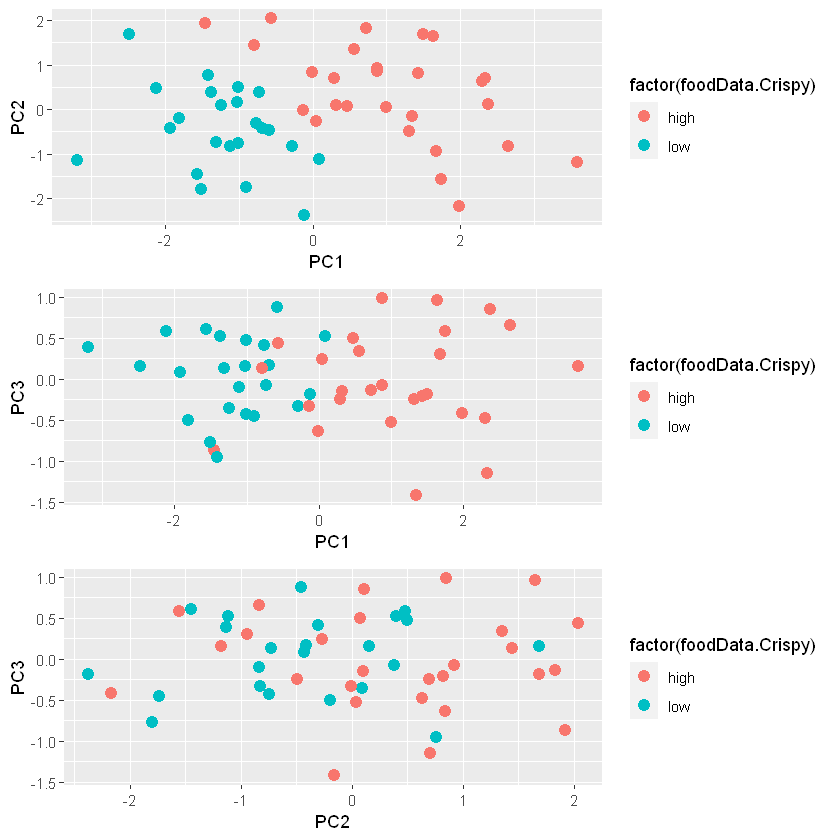

In [124]:
library(gridExtra)
grid.arrange(pc1,pc2,pc3)